<a href="https://colab.research.google.com/github/spch88/my_project/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B0%D1%80%D0%BE%D0%BA_%D0%B2%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание

Используя модуль **datasets** библиотеки **sklearn**, загрузите базу вин (`.load_wine()`).

Используя шаблон ноутбука, выполните загрузку, подготовку и предобработку данных. Обязательное условие: разделение данных на три выборки осуществляется по шаблону (изменять параметры подготовки данных запрещается)!

Проведите серию экспериментов и добейтесь максимальной точности классификации на тестовой выборке выше 94%.

---

С помощью метода `.summary()` зафиксируйте количество параметров созданной вами нейронной сети.


#Шаблон ноутбука

In [ ]:
# Последовательная модель НС
from tensorflow.keras.models import Sequential      

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization 

# Утилиты для to_categorical()
from tensorflow.keras import utils    

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam  

# Библиотека для работы с массивами
import numpy as np    

# Отрисовка графиков
import matplotlib.pyplot as plt    

# Разделение данных на выборки
from sklearn.model_selection import train_test_split 

# Для загрузки датасета
from sklearn.datasets import load_wine                     

# Отрисовка изображений в ноутбуке, а не в консоли или файле
%matplotlib inline

##Описание базы

1. Датасет состоит из набора данных о винах и их классах.
2. Данные по одному вину хранятся в numpy-массиве `x_data`: (`13` параметров).
3. В датасете `3` класса вин: `y_data`.
4. Количество примеров: `178`.

In [ ]:
x_data = load_wine()['data']              # Загрузка набора данных о винах
y_data = load_wine()['target']            # Загрузка классов вин

print('Размерность x_data -', x_data.shape)
print('Размерность y_data -', y_data.shape)
print()

# Вывод примера данных
print('Данные по первому вину:',x_data[0])
print('Класс вина:',y_data[0])

Размерность x_data - (178, 13)
Размерность y_data - (178,)

Данные по первому вину: [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
Класс вина: 0


##Подготовка данных

In [ ]:
# Перевод в one hot encoding
y_data = utils.to_categorical(y_data, 3)

# Разбиение наборов на общую и тестовую выборки
x_all, x_test, y_all, y_test = train_test_split(x_data, 
                                                y_data, 
                                                test_size=0.1, 
                                                shuffle=True, 
                                                random_state = 6)

# Разбиение общей выборки на обучающую и проверочную 
x_train, x_val, y_train, y_val = train_test_split(x_all, 
                                                  y_all, 
                                                  test_size=0.1, 
                                                  shuffle=True, 
                                                  random_state = 6)

print(x_train.shape)
print(y_train.shape)
print()
print(x_val.shape)
print(y_val.shape)

(144, 13)
(144, 3)

(16, 13)
(16, 3)


In [ ]:
import pandas as pd

# создадим две структуры НС: с одним скрытым слоем и с двумя слоями
COUNT_INPUT = 13 # количество входных параметров
COUNT_CLASS = 3 # количество классов

# определение функции, реализующей структуру НС1
def CreateModel1(n_neuron1, n_neuron2):
  model = Sequential()

  model.add(Dense(n_neuron1, input_dim=COUNT_INPUT, activation='relu'))
  model.add(Dense(n_neuron2, activation='relu'))
  model.add(Dense(COUNT_CLASS, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_split=0.2, verbose=1)   
  scores = model.evaluate(x_test, y_test, verbose=0)

  return history, scores

# определение функции, реализующей структуру НС2
def CreateModel2(n_neuron1, n_neuron2, n_neuron3):
  model = Sequential()

  model.add(Dense(n_neuron1, input_dim=COUNT_INPUT, activation='relu'))
  model.add(Dense(n_neuron2, activation='relu'))
  model.add(Dense(n_neuron3, activation='relu'))
  model.add(Dense(COUNT_CLASS, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_split=0.2, verbose=1)   
  scores = model.evaluate(x_test, y_test, verbose=0)

  return history, scores  

In [ ]:
# набор параметров НС1
parameter1_1 = [1000, 900, 800, 700, 600, 500, 400, 300, 200, 100]  # количество нейронов входного слоя 
parameter2_1 = [200, 150, 125, 100, 80, 60, 50, 40, 20, 10]  # количество нейронов скрытого слоя

# набор параметров НС2
parameter1_2 = [500, 400, 300, 200, 100]  # количество нейронов входного слоя
parameter2_2 = [150, 100, 75, 50, 20]  # количество нейронов первого скрытого слоя
parameter3_2 = [30, 10]  # количество нейронов второго скрытого слоя

# списки для записи результатов обучения сети
acc1, val_acc1, test1 = [],[],[]
acc2, val_acc2, test2 = [],[],[]
parameter11, parameter21 = [],[]
parameter12, parameter22, parameter32 = [],[],[]

# тестирование НС1
for i in range(10):
  parameter11.append(parameter1_1[i])
  parameter21.append(parameter2_1[i])
  history, scores = CreateModel1(parameter1_1[i], parameter2_1[i])
  acc1.append(round(history.history['accuracy'][len(history.history['accuracy']) - 1], 4))
  val_acc1.append(round(history.history['val_accuracy'][len(history.history['val_accuracy']) - 1], 4))
  test1.append(round(scores[1], 4))

df1 = pd.DataFrame({'Вх. слой, шт.': parameter11,
                    'Скрытый слой, шт.': parameter21, 
                    'Точность на тренировочной выборке': acc1,
                    'Точность на проверочной выборке': val_acc1,
                    'Точность на тестовой выборке': test1})
# тестирование НС2
for j in range(2):
  for i in range(5):
    parameter12.append(parameter1_2[i])
    parameter22.append(parameter2_2[i])
    parameter32.append(parameter3_2[j])
    history, scores = CreateModel2(parameter1_2[i], parameter2_2[i], parameter3_2[j])
    acc2.append(round(history.history['accuracy'][len(history.history['accuracy']) - 1], 4))
    val_acc2.append(round(history.history['val_accuracy'][len(history.history['val_accuracy']) - 1], 4))
    test2.append(round(scores[1], 4))

df2 = pd.DataFrame({'Вх. слой, шт.': parameter12,
                    'Скрытый слой 1, шт.': parameter22,
                    'Скрытый слой 2, шт.': parameter32,
                    'Точность на тренировочной выборке': acc2,
                    'Точность на проверочной выборке': val_acc2,
                    'Точность на тестовой выборке': test2})     



Epoch 1/100
6/6 [==============================] - 3s 50ms/step - loss: 51.8248 - accuracy: 0.3217 - val_loss: 94.8983 - val_accuracy: 0.1724
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 36.6757 - accuracy: 0.3826 - val_loss: 18.9225 - val_accuracy: 0.3103
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 22.5972 - accuracy: 0.3913 - val_loss: 14.2389 - val_accuracy: 0.2069
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 13.3497 - accuracy: 0.3826 - val_loss: 11.0247 - val_accuracy: 0.3448
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 7.9750 - accuracy: 0.5652 - val_loss: 5.6181 - val_accuracy: 0.5517
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 3.6716 - accuracy: 0.6087 - val_loss: 1.9444 - val_accuracy: 0.4483
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 2.7888 - accuracy: 0.6783 - val_loss: 6.4271 - val_accuracy: 0.4138
Epoch 8/100
6/6 [

In [ ]:
# вывод результатов обучения НС1
df1

,"Вх. слой, шт.","Скрытый слой, шт.",Точность на тренировочной выборке,Точность на проверочной выборке,Точность на тестовой выборке
0,1000,200,0.9391,0.9310,0.8889
1,900,150,0.7478,0.7586,0.7778
2,800,125,0.8000,0.7586,0.9444
3,700,100,0.8435,0.8966,0.9444
4,600,80,0.8783,0.8966,0.8889
5,500,60,0.9217,0.8621,0.9444
6,400,50,0.9130,0.8276,0.8889
7,300,40,0.9652,0.9310,0.9444
8,200,20,0.8609,0.8276,0.8889
9,100,10,0.8174,0.8276,0.8889


In [ ]:
# вывод результатов обучения НС1
df2

,"Вх. слой, шт.","Скрытый слой 1, шт.","Скрытый слой 2, шт.",Точность на тренировочной выборке,Точность на проверочной выборке,Точность на тестовой выборке
0,500,150,30,0.9391,0.9655,0.8889
1,400,100,30,0.8522,0.8966,0.9444
2,300,75,30,0.9478,0.8966,0.9444
3,200,50,30,0.8957,0.8276,0.8333
4,100,20,30,0.8870,0.8966,0.9444
5,500,150,10,0.9130,0.9310,0.9444
6,400,100,10,0.8000,0.8966,0.9444
7,300,75,10,0.8783,0.8621,0.8333
8,200,50,10,0.3565,0.5517,0.4444
9,100,20,10,0.8957,0.9310,0.9444


Как видно из таблиц, есть несколько конфигураций сети, удовлетворяющих поставленным условиям задачи по точности на тестовой выборке. Исследуем произвольно выбранную из этих сетей более подробно.

In [ ]:
model = Sequential()
model.add(Dense(300, input_dim=COUNT_INPUT, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(COUNT_CLASS, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=20, epochs=500, validation_split=0.2, verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 40ms/step - loss: 54.3433 - accuracy: 0.3565 - val_loss: 23.0586 - val_accuracy: 0.2759
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 14.2694 - accuracy: 0.2000 - val_loss: 14.2475 - val_accuracy: 0.1724
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 14.0998 - accuracy: 0.3652 - val_loss: 6.1676 - val_accuracy: 0.5517
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 6.0325 - accuracy: 0.3130 - val_loss: 10.3890 - val_accuracy: 0.1724
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 7.2623 - accuracy: 0.4087 - val_loss: 1.9845 - val_accuracy: 0.5517
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 3.3729 - accuracy: 0.3826 - val_loss: 2.4772 - val_accuracy: 0.2759
Epoch 7/500
6/6 [==============================] - 0s 11ms/step - loss: 1.3731 - accuracy: 0.5565 - val_loss: 0.8161 - val_accuracy: 0.6552
Epoch 8/500
6/6 [==

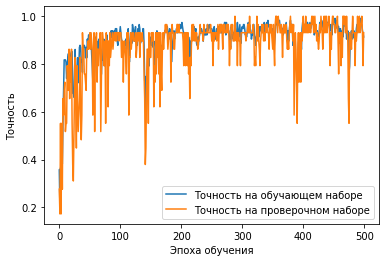

In [ ]:
plt.plot(history.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Точность на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

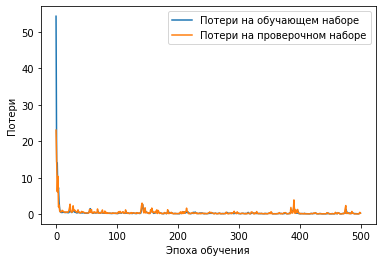

In [ ]:
plt.plot(history.history['loss'], label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], label='Потери на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
round(scores[1], 4) * 100

94.44

Требуемая точность достигнута. С увеличением продолжительности обучения признаков переобучения сети не наблюдается, а значит нет необходимости в ее дополнительной оптимизации.